In [1]:
import requests
import pandas as pd

#Make API call and store dataframes of summaries for each well inside of jobData array.

APIKey = 'Bearer b+S15uKWEK0lFU+NomEmvekn8yk/ALTTBAYOJalVKrI='
session = requests.Session()
session.headers.update({'Authorization': APIKey})
response = session.get('https://api.welldatalabs.com/jobsummaries')

allData = pd.DataFrame(response.json())
jobData = []
for row in allData.iterrows():
    data = pd.DataFrame(row[1][2])
    data.columns = pd.DataFrame(row[1][1])['name']
    jobData.append(data)

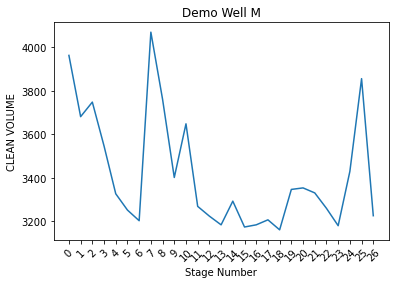

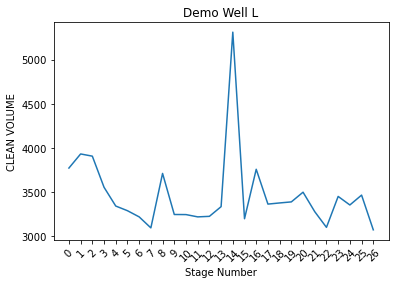

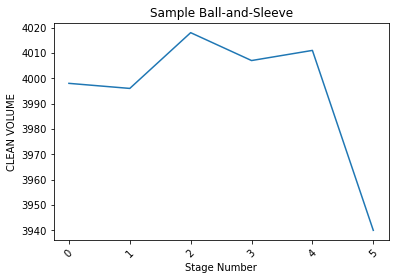

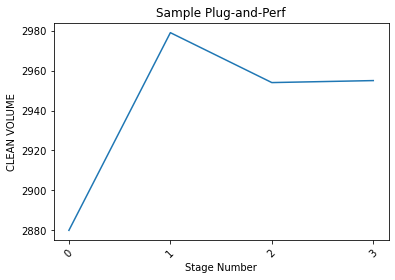

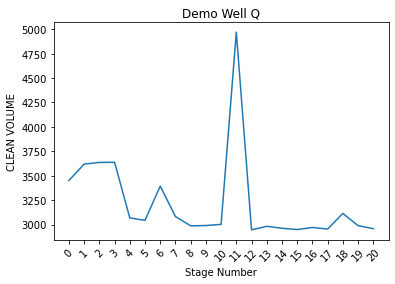

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

desiredParam = 'CLEAN VOLUME'  #desired parameter to be plotted per stage number.

for item in jobData:
    numericdata = [float(number.replace(',', '')) for number in item[desiredParam]]
    fig, ax = plt.subplots()
    plt.plot(item['STAGE NUMBER'][1:], numericdata[1:])
    plt.xlabel('Stage Number')
    plt.ylabel(desiredParam)
    plt.title(item['WELL NAME'][0])
    plt.xticks(rotation=45)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    plt.show()